# Aproximación por Polinomios de Legendre
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Teoría

Anteriormente observamos que los polinomios de Legendre forman un conjunto ortogonal en el intervalo $t\:\epsilon\:(-1,\;1)$, cumpliendo lo siguiente:
$$
\int_{-1}^{1} {P_n(t)P_m(t)}dt = 
\begin{cases} 
0, & \text{; } m \neq n \\ 
\frac{2}{n+1}, & \text{; } m = n 
\end{cases}
$$
Usando la ecuación de 1.45 de las notas de Anguiano, ahora aplicada a los polinomios de Legendre obtenemos:
$$
A_{k}=\frac{\int_{-1}^{1}{f(t)P_{k}(t)}dt}{\int_{-1}^{1}{[P_{k}(t)]^{2}dt}}
$$
Y por la condición de ortogonalidad dada anteriormente para los polinomios de Legendre,
$$
A_{k} = \frac{2k+1}{2}\int_{-1}^{1}{f(t)P_{k}(t)dt}

## Ejemplo 1.4 de las notas de Anguiano



Aproximar la función
$$f(t) = cos\left(\frac{\pi}{2}t\right)$$
En el intervalo $t\:\epsilon\:(-1,\;1)$ por la suma de los tres primeros polinomios de Legendre
$$
\begin{align}
f_{a}(t) =& A_{0}P_{0}(t) + A_{1}P_{1}(t) + A_{2}P_{2}(t) \notag \\
f_{a}(t) =& A_{0} + A_{1}t + A_{2}\left(\frac{3}{2}t^{2} - \frac{1}{2}\right) \notag
\end{align}
$$

### Solución
Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import factorial

Reusamos nuestra función que calcula los polinomios de Legendre

In [2]:
def polinomio_legendre (n,t):
    coeficiente = 1/(2**n * factorial(n)) #Coeficiente de la formula
    # Calcular la derivada n-ésima de (t^2 - 1)^n
    # np.poly1d crea un polinomio a partir de sus coeficientes
    base = np.poly1d([1, 0, -1])**n  # Esto representa (t^2 - 1)^n
    derivada = np.polyder(base, n)  # Derivada n-ésima de la base
    Pn = coeficiente * derivada(t)
    return Pn #Retornamos el valor del polinomio

t = np.linspace(-1,1,100) #Vector t para evaluar al polinomio

Definimos nuestro integrando

In [3]:
# Función f(t)
def f(t):
    return np.cos(np.pi/2.*t)

# Definimos el integrando como el producto de la función f(t) y el polinomio k-ésimo de Legrenge Pk(t)
def integrando(t,k):
    return f(t) * polinomio_legendre(k, t)

Pedimos al usuario el grado del polinomio de Legendre

In [4]:
n=int(input("Cantidad de polinomios a crear: "))

Cantidad de polinomios a crear: 5


Calculamos nuestros coeficientes

In [5]:
# Creamos nuestro arreglo de coeficientes
A = np.zeros([n,1])
fa = 0

# Ciclo para el cálculo de los coeficientes Ak
for k in range(n):
    integral,_ = quad(integrando, -1, 1,args=(k,))
    coef = (2*k+1)/2
    A[k] = coef*integral
    fa += A[k]*polinomio_legendre(k,t)#Creamos la función aproximada
#imprimimos los coeficientes Ak
A

array([[ 0.63661977],
       [ 0.        ],
       [-0.68708527],
       [ 0.        ],
       [ 0.05177895]])

Graficamos las funciones

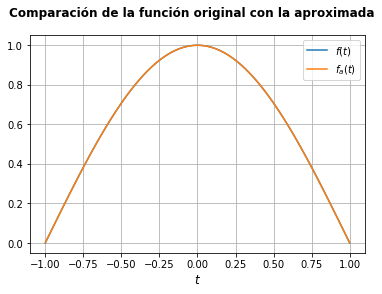

In [6]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función original con respecto al vector de la variable independiente
plt.plot(t, f(t), label='$f(t)$')

# Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
plt.plot(t, fa, label='$f_a(t)$')

# Se edita la figura
plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
plt.suptitle('Comparación de la función original con la aproximada', weight='bold')  # Se escribe el título de la gráfica
plt.grid()  # Se grafica la cuadrícula
plt.legend()  # Se imprime la leyenda

# Mostrar la gráfica
plt.show()